# Предварительная обработка признаков для датасета и построение первияной модели.

- первичная загрузка датасета  
- визуализация признаков
- первичная обработка признаков
-- анализ числовых признаков
-- анализ категориальных признаков

In [388]:
import pandas as pd
import numpy as np

In [389]:
import importlib

In [390]:
import pickle

In [391]:
pd.options.mode.chained_assignment = None

In [392]:
#!pip install ipynb

You should consider upgrading via the 'C:\Users\ПК\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [393]:
import matplotlib.pyplot as plt
import seaborn as sns

In [394]:
sns.set_theme(style="whitegrid")

In [395]:
from sklearn.model_selection import train_test_split

In [396]:
import xgboost

In [397]:
import catboost

In [398]:
from ipynb.fs.full import process_functions as func

In [399]:
importlib.reload(func)

<module 'ipynb.fs.full.process_functions' (D:\Learning\GeekBrains\_Final Project\process_functions.ipynb)>

In [400]:
from sklearn.metrics import mean_squared_error as mse

In [401]:
pd.set_option('display.max_columns', None)

In [402]:
pd.set_option("max_rows", None)

Список имен колонок с разбивкой по типам данных для последующего препроцессинга.

In [326]:
float_columns = ['full_sq', 'life_sq', 'kitch_sq', 'area_m',  'green_zone_part', 'indust_part', 'metro_min_avto',
                 'metro_km_avto', 'metro_min_walk', 'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km', 'green_zone_km',
                 'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km', 'railroad_station_walk_km',
                 'railroad_station_walk_min', 'railroad_station_avto_km', 'railroad_station_avto_min', 'public_transport_station_km',
                 'public_transport_station_min_walk', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
                 'kremlin_km', 'big_road1_km', 'big_road2_km', 'railroad_km', 'zd_vokzaly_avto_km', 'bus_terminal_avto_km',
                'oil_chemistry_km', 'nuclear_reactor_km', 'radiation_km', 'power_transmission_line_km', 'thermal_power_plant_km',
                'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km', 
                'basketball_km', 'hospice_morgue_km', 'detention_facility_km', 'public_healthcare_km', 'university_km', 
                'workplaces_km', 'shopping_centers_km', 'office_km', 'additional_education_km', 'preschool_km', 'big_church_km',
                'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km', 'exhibition_km', 'catering_km', 'green_part_500',
                'prom_part_500', 'office_sqm_500', 'trc_sqm_500', 'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg',
                'cafe_avg_price_500', 'green_part_1000', 'prom_part_1000', 'office_sqm_1000', 'trc_sqm_1000', 
                'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000', 'green_part_1500',
                'prom_part_1500', 'office_sqm_1500', 'trc_sqm_1500', 'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg',
                'cafe_avg_price_1500', 'green_part_2000', 'prom_part_2000', 'office_sqm_2000', 'trc_sqm_2000', 'cafe_sum_2000_min_price_avg',
                'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000', 'green_part_3000', 'prom_part_3000', 'office_sqm_3000', 'trc_sqm_3000',
                'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000', 'green_part_5000', 'prom_part_5000',
                'office_sqm_5000', 'trc_sqm_5000', 'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000'
                ]

In [327]:
integer_columns = ['raion_popul', 'children_preschool', 'preschool_quota', 'children_school', 'school_quota', 
                  'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion', 'university_top_20_raion',
                  'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'shopping_centers_raion',
                  'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male',
                  'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', 
                  '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male',
                  '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame',
                  'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag', 
                  'build_count_mix', 'raion_build_count_with_builddate_info', 'build_count_before_1920', 'build_count_1921-1945', 
                  'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995', 'office_count_500', 'trc_count_500',
                  'cafe_count_500', 'cafe_count_500_na_price', 'cafe_count_500_price_500', 'cafe_count_500_price_1000', 
                  'cafe_count_500_price_1500', 'cafe_count_500_price_2500', 'cafe_count_500_price_4000', 'cafe_count_500_price_high',
                  'big_church_count_500', 'church_count_500', 'mosque_count_500', 'leisure_count_500', 'sport_count_500',
                  'market_count_500', 'office_count_1000', 'trc_count_1000', 'cafe_count_1000', 'cafe_count_1000_na_price', 
                  'cafe_count_1000_price_500', 'cafe_count_1000_price_1000', 'cafe_count_1000_price_1500', 'cafe_count_1000_price_2500',
                  'cafe_count_1000_price_4000', 'cafe_count_1000_price_high', 'big_church_count_1000', 'church_count_1000', 'mosque_count_1000',
                  'leisure_count_1000', 'sport_count_1000', 'market_count_1000', 'office_count_1500', 'trc_count_1500', 'cafe_count_1500',
                  'cafe_count_1500_na_price', 'cafe_count_1500_price_500', 'cafe_count_1500_price_1000', 'cafe_count_1500_price_1500', 
                  'cafe_count_1500_price_2500', 'cafe_count_1500_price_4000', 'cafe_count_1500_price_high', 'big_church_count_1500', 
                  'church_count_1500', 'mosque_count_1500', 'leisure_count_1500', 'sport_count_1500', 'market_count_1500', 'office_count_2000',
                  'trc_count_2000', 'cafe_count_2000', 'cafe_count_2000_na_price', 'cafe_count_2000_price_500', 'cafe_count_2000_price_1000',
                  'cafe_count_2000_price_1500', 'cafe_count_2000_price_2500', 'cafe_count_2000_price_4000', 'cafe_count_2000_price_high',
                  'big_church_count_2000', 'church_count_2000', 'mosque_count_2000', 'leisure_count_2000', 'sport_count_2000', 
                  'market_count_2000', 'office_count_3000', 'trc_count_3000', 'cafe_count_3000', 'cafe_count_3000_na_price', 
                  'cafe_count_3000_price_500', 'cafe_count_3000_price_1000', 'cafe_count_3000_price_1500', 'cafe_count_3000_price_2500',
                  'cafe_count_3000_price_4000', 'cafe_count_3000_price_high', 'big_church_count_3000', 'church_count_3000', 'mosque_count_3000',
                  'leisure_count_3000', 'sport_count_3000', 'market_count_3000', 'office_count_5000', 'trc_count_5000', 'cafe_count_5000',
                  'cafe_count_5000_na_price', 'cafe_count_5000_price_500', 'cafe_count_5000_price_1000', 'cafe_count_5000_price_1500', 
                  'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000', 'cafe_count_5000_price_high', 'big_church_count_5000', 
                  'church_count_5000', 'mosque_count_5000', 'leisure_count_5000', 'sport_count_5000', 'market_count_5000']

In [328]:
discrete_columns = ['floor', 'material', 'build_year', 'num_room', 'state', 'preschool_education_centers_raion',
                   'school_education_centers_raion', 'school_education_centers_top_20_raion', 'culture_objects_top_25_raion',
                   'ID_metro', 'ID_railroad_station_walk', 'ID_railroad_station_avto', 'ID_big_road1', 'ID_big_road2', 'ID_railroad_terminal',
                   'ID_bus_terminal' ]

In [329]:
object_columns = ['product_type', 'sub_area', 'thermal_power_plant_raion', 'incineration_raion', 'culture_objects_top_25',
                 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion',
                 'nuclear_reactor_raion', 'detention_facility_raion', 'ecology', 'water_1line', 'big_road1_1line', 'railroad_1line'
                 ]

## Работа с датасетом

загружаем файл

На текущем этапе работа 

In [15]:
df = pd.read_csv('project_data/attempt_4/train.csv')

In [16]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [17]:
df.shape

(30471, 292)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [19]:
empty_fields = df.isna().sum()
empty_fields

id                       0
timestamp                0
full_sq                  0
life_sq               6383
floor                  167
                      ... 
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
price_doc                0
Length: 292, dtype: int64

In [20]:
empty_fields = pd.DataFrame(empty_fields, columns=['number'])
empty_fields.head()

,number
id,0
timestamp,0
full_sq,0
life_sq,6383
floor,167


In [21]:
empty_fields = empty_fields[empty_fields['number']>0]
empty_fields.shape

(51, 1)

In [22]:
df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [23]:
dataset_columns = df.columns

разобъем датасет на категориальные и цифровые признаки

Разобъем колонки на несколько групп.  
Категориальные и числовые признаки будут обрабатываться отдельно по разным правилам.  
так же отдельной группой будут выделены признаки, которые могут иметь только дискретные значения.

In [24]:
num_columns_main = ['full_sq','life_sq', 'floor', 'max_floor', 'num_room', 'kitch_sq' ]

In [25]:
num_columns_extra = ['full_all' 'male_f' 'female_f', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 
                     'children_preschool', 'preschool_quota', 'preschool_education_centers_raion',  'children_school',
                     'school_quota', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 
                     'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 
                     'shopping_centers_raion', 'office_raion',   'young_all',   'young_male',  'young_female'
                     'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all',
                     '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male',
                     '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female',
                     'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame',
                     'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag',
                     'build_count_mix', 'raion_build_count_with_builddate_info', 'build_count_before_1920',
                     'build_count_1921-1945', 'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995',
                     'metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk', 'kindergarten_km', 'school_km',
                     'park_km', 'green_zone_km', 'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km',
                     'railroad_station_walk_km', 'railroad_station_walk_min', 'railroad_station_avto_km',
                     'railroad_station_avto_min', 'public_transport_station_km', 'public_transport_station_min_walk',
                     'water_km',  'mkad_km',  'ttk_km',  'sadovoe_km',  'bulvar_ring_km',  'kremlin_km',  'big_road1_km',
                     'big_road2_km',  'railroad_km',   'zd_vokzaly_avto_km',  'bus_terminal_avto_km',  'oil_chemistry_km',
                     'nuclear_reactor_km', 'radiation_km',  'power_transmission_line_km',  'thermal_power_plant_km',
                     'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km',
                     'basketball_km', 'hospice_morgue_km', 'detention_facility_km', 'public_healthcare_km', 'university_km',
                     'workplaces_km', 'shopping_centers_km', 'office_km', 'additional_education_km', 'preschool_km',
                     'big_church_km', 'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km', 'exhibition_km',
                     'catering_km',  'green_part_500', 'prom_part_500', 'office_count_500', 'office_sqm_500',
                     'trc_count_500', 'trc_sqm_500', 'cafe_count_500', 'cafe_sum_500_min_price_avg',
                     'cafe_sum_500_max_price_avg', 'cafe_avg_price_500', 'cafe_count_500_na_price', 'cafe_count_500_price_500',
                     'cafe_count_500_price_1000', 'cafe_count_500_price_1500', 'cafe_count_500_price_2500',
                     'cafe_count_500_price_4000', 'cafe_count_500_price_high', 'big_church_count_500',
                     'church_count_500', 'mosque_count_500', 'leisure_count_500', 'sport_count_500', 'market_count_500',
                     'green_part_1000', 'prom_part_1000', 'office_count_1000', 'office_sqm_1000', 'trc_count_1000',
                     'trc_sqm_1000', 'cafe_count_1000', 'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg',
                     'cafe_avg_price_1000', 'cafe_count_1000_na_price', 'cafe_count_1000_price_500',
                     'cafe_count_1000_price_1000', 'cafe_count_1000_price_1500', 'cafe_count_1000_price_2500',
                     'cafe_count_1000_price_4000', 'cafe_count_1000_price_high', 'big_church_count_1000', 'church_count_1000',
                     'mosque_count_1000', 'leisure_count_1000', 'sport_count_1000', 'market_count_1000', 'green_part_1500',
                     'prom_part_1500',  'office_count_1500',  'office_sqm_1500', 'trc_count_1500', 'trc_sqm_1500',
                     'cafe_count_1500', 'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500',
                     'cafe_count_1500_na_price', 'cafe_count_1500_price_500', 'cafe_count_1500_price_1000',
                     'cafe_count_1500_price_1500', 'cafe_count_1500_price_2500', 'cafe_count_1500_price_4000',
                     'cafe_count_1500_price_high', 'big_church_count_1500', 'church_count_1500', 'mosque_count_1500',
                     'leisure_count_1500', 'sport_count_1500', 'market_count_1500', 'green_part_2000', 'prom_part_2000',
                     'office_count_2000', 'office_sqm_2000', 'trc_count_2000', 'trc_sqm_2000', 'cafe_count_2000',
                     'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000',
                     'cafe_count_2000_na_price', 'cafe_count_2000_price_500', 'cafe_count_2000_price_1000',
                     'cafe_count_2000_price_1500', 'cafe_count_2000_price_2500', 'cafe_count_2000_price_4000',
                     'cafe_count_2000_price_high', 'big_church_count_2000', 'church_count_2000', 'mosque_count_2000',
                     'leisure_count_2000', 'sport_count_2000', 'market_count_2000', 'green_part_3000', 'prom_part_3000',
                     'office_count_3000', 'office_sqm_3000', 'trc_count_3000', 'trc_sqm_3000', 'cafe_count_3000',
                     'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000',
                     'cafe_count_3000_na_price', 'cafe_count_3000_price_500', 'cafe_count_3000_price_1000',
                     'cafe_count_3000_price_1500', 'cafe_count_3000_price_2500', 'cafe_count_3000_price_4000',
                     'cafe_count_3000_price_high', 'big_church_count_3000', 'church_count_3000', 'mosque_count_3000',
                     'leisure_count_3000', 'sport_count_3000', 'market_count_3000', 'green_part_5000', 'prom_part_5000',
                     'office_count_5000', 'office_sqm_5000', 'trc_count_5000', 'trc_sqm_5000', 'cafe_count_5000',
                     'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000',
                     'cafe_count_5000_na_price', 'cafe_count_5000_price_500', 'cafe_count_5000_price_1000',
                     'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
                     'cafe_count_5000_price_high', 'big_church_count_5000', 'church_count_5000', 'mosque_count_5000',
                     'leisure_count_5000', 'sport_count_5000', 'market_count_5000',]

In [26]:
cat_columns_main = ['material', 'build_year',  'state',  'product_type',  'sub_area']

In [27]:
cat_columns_extra = ['preschool_education_centers_raion', 'school_education_centers_top_20_raion', 
                     'culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 
                     'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 
                     'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 
                     'ID_metro', 'ID_railroad_station_walk',  'ID_railroad_station_avto',  'ecology', 
                     'water_1line', 'big_road1_1line', 'ID_big_road2', 'railroad_1line']

In [28]:
extra_columns = ['id', 'timestamp', ]

In [29]:
target_variable = ['price_doc']

В случае отсутствия каких-либо полей в дополнительном сете признаковзаполнение NaN величин будет выполнятся при помощи среднего по району  'sub_area'  
Выбросы в дополнительных признаках обрабатываться на предварительном  этапе не будут.  
Выбросы в основных признаках будут обрабатываться - заведомо невозможные величины будут исключены.
Год постройки будет приведен к четырехзначному формату  
Основные категориальные признаки будут обработаны отдельно.  

In [30]:
df.columns.to_list()

['id',
 'timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all'

### Анализ признаков по отдельности для каждого из типов признаков.

#### Анализ числовых признаков

Параллельно с анализом признаков имеет смысл определять выбросы.  
Если соличество значений, которые являются выбросами сравнительно невелико (меньше одного процента от датасета, то имеет смысл удалять такие значения для тренировочного датасета).
По результататм анализа данных будут 

In [31]:
len(num_columns_main)

6

In [32]:
len(num_columns_extra)

253

Признаки с обозачением extra - большей частью статистические признаки. Дополнительный анализ статистических признаков будет осуществляться отдельно.

выведем статистику для основных признаков:

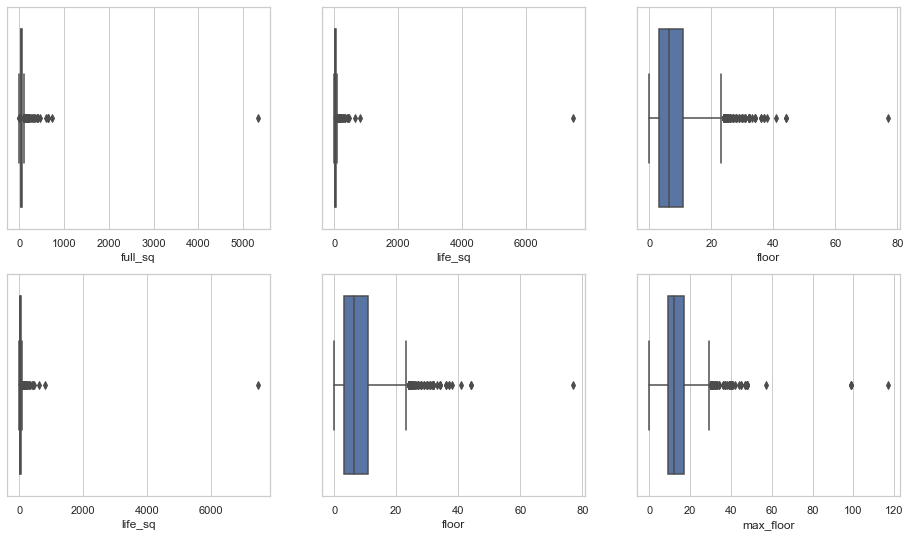

In [33]:
num_list_next = num_columns_main
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
for i in range(2):    
    for j in range (3):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])    

In [34]:
df[num_columns_main].describe()

,full_sq,life_sq,floor,max_floor,num_room,kitch_sq
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,20899.000000
mean,54.214269,34.403271,7.670803,12.558974,1.909804,6.399301
std,38.031487,52.285733,5.319989,6.756550,0.851805,28.265979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.000000
50%,49.000000,30.000000,6.500000,12.000000,2.000000,6.000000
75%,63.000000,43.000000,11.000000,17.000000,2.000000,9.000000
max,5326.000000,7478.000000,77.000000,117.000000,19.000000,2014.000000


Выведем явно завышенные и заниженные значения.

Общая площадь

<AxesSubplot:>

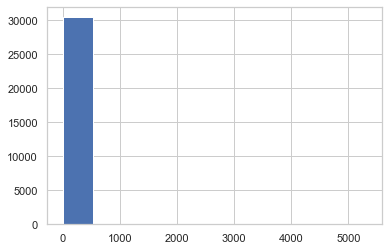

In [35]:
df['full_sq'].hist()

In [36]:
df[df['full_sq'] >= 1000]['full_sq'].count()

1

In [37]:
df[df['full_sq'] < 14]['full_sq'].count()

44

In [38]:
df[(df['full_sq'] <= 1000) & (df['full_sq'] >= 14)]['full_sq'].mean()

54.11184513245251

Жилая площадь

<AxesSubplot:>

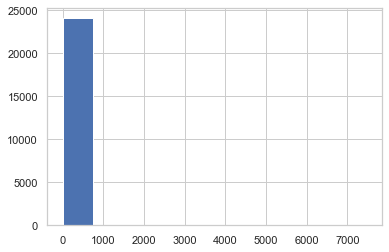

In [39]:
df['life_sq'].hist()

In [40]:
df[df['life_sq'] >= 750]['life_sq'].count()

2

In [41]:
df[df['life_sq'] < 1]['life_sq'].count()

45

In [42]:
df[(df['life_sq'] <= 750) & (df['life_sq'] >= 1)]['life_sq'].mean()

34.126117881951664

Площадь кухни

<AxesSubplot:>

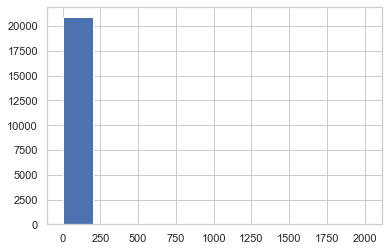

In [43]:
df['kitch_sq'].hist()

In [44]:
df[df['kitch_sq'] >= 100]['kitch_sq'].count()

9

In [45]:
df[(df['kitch_sq'] <= 750) & (df['kitch_sq'] >= 1)]['kitch_sq'].mean()

6.4450138362201495

Этаж, на котором расположена квартира

<AxesSubplot:>

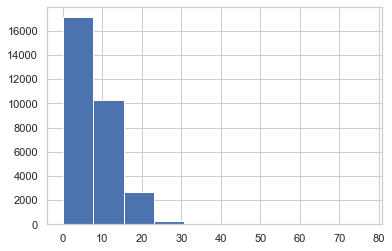

In [46]:
df['floor'].hist()

In [47]:
df[df['floor'] >= 40]['floor'].count()

4

In [48]:
df[df['floor'] < 1]['floor'].count()

9

In [49]:
round(df[(df['floor'] <= 40) & (df['floor'] >= 1)]['floor'].mean(), 0)

8.0

Количество  этажей в доме

<AxesSubplot:>

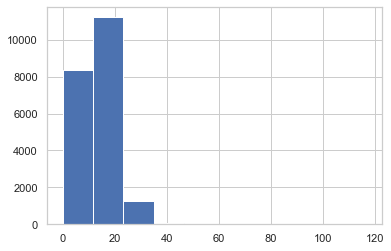

In [50]:
df['max_floor'].hist()

In [51]:
df[df['max_floor'] < 1]['max_floor'].count()

550

Количество комнат

<AxesSubplot:>

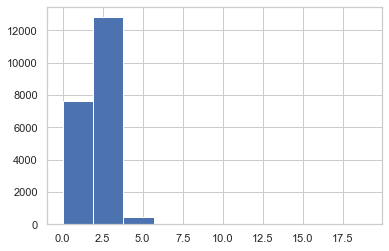

In [52]:
df['num_room'].hist()

In [53]:
df[df['num_room'] < 1]['num_room'].count()

14

In [54]:
round(df[(df['num_room'] >= 1 )]['num_room'].mean(), 0)

2.0

#### Первичый анализ категориальных признаков

In [55]:
len(cat_columns_main)

5

In [56]:
cat_columns_main

['material', 'build_year', 'state', 'product_type', 'sub_area']

Проверка количества nan значений:

In [57]:
df[cat_columns_main].isna().sum()

material         9572
build_year      13605
state           13559
product_type        0
sub_area            0
dtype: int64

In [58]:
df['state'].mode()

0    2.0
dtype: float64

In [59]:
df['material'].mode()

0    1.0
dtype: float64

In [60]:
df[df['build_year']<1000 ]['build_year'].unique()

array([  0.,   1.,   3.,  20., 215.,  71.])

In [61]:
df[cat_columns_extra].isna().sum()

preschool_education_centers_raion         0
school_education_centers_top_20_raion     0
culture_objects_top_25                    0
thermal_power_plant_raion                 0
incineration_raion                        0
oil_chemistry_raion                       0
radiation_raion                           0
railroad_terminal_raion                   0
big_market_raion                          0
nuclear_reactor_raion                     0
detention_facility_raion                  0
ID_metro                                  0
ID_railroad_station_walk                 25
ID_railroad_station_avto                  0
ecology                                   0
water_1line                               0
big_road1_1line                           0
ID_big_road2                              0
railroad_1line                            0
dtype: int64

In [62]:
df['ID_railroad_station_walk'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123.,  nan, 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133.])

### Анализ целевой переменой

In [63]:
df['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

<AxesSubplot:xlabel='price_doc', ylabel='Count'>

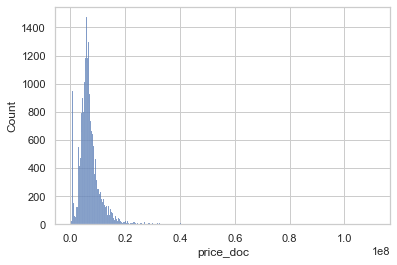

In [64]:
sns.histplot(data=df['price_doc'])

<AxesSubplot:>

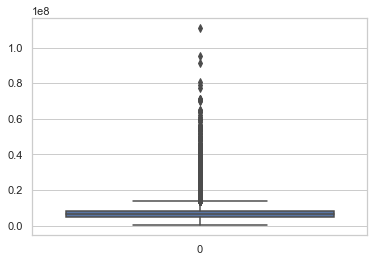

In [65]:
sns.boxplot(data=df['price_doc'])

Рспределение целевой переменной неисимметричное.

### Применение выбраных методов обработки к датасету.

In [66]:
df.shape

(30471, 292)

In [162]:
X.isna().sum()

full_sq                                      0
life_sq                                      0
floor                                        0
material                                     0
build_year                                   0
num_room                                     0
kitch_sq                                     0
state                                        0
product_type                                 0
sub_area                                     0
area_m                                       0
raion_popul                                  0
green_zone_part                              0
indust_part                                  0
children_preschool                           0
preschool_quota                           6688
preschool_education_centers_raion            0
children_school                              0
school_quota                              6685
school_education_centers_raion               0
school_education_centers_top_20_raion        0
hospital_beds

In [303]:
mean_values_by_region = dict()
mode_values_by_dataset = dict()

In [337]:
for column_name in df.columns:
            if column_name in extra_columns:
                continue
            if column_name in float_columns or column_name in integer_columns:
                mean_series = df.groupby('sub_area')[column_name].mean()
                mean_values_by_region[column_name] = mean_series
            elif column_name in discrete_columns or column_name in object_columns:
                mean_series = df.groupby('sub_area')[column_name].agg(pd.Series.mode)
                mean_values_by_region[column_name] = mean_series

In [338]:
        with open('mean_values_by_region.pickle', 'wb') as f:
                pickle.dump(mean_values_by_region, f, protocol=pickle.HIGHEST_PROTOCOL)

In [346]:
df_zero = df.copy()

In [347]:
    for key in mean_values_by_region:
        values = mean_values_by_region[key]
        #print(values)
        #temp = df['sub_area'].map(values) #temp decision
        #df_zero[key] = df_zero[key].fillna(0) #temp decision
        df_zero[key] = df_zero[key].fillna(df_zero['sub_area'].apply(lambda x: values.get(x)))
        print(df_zero[key].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [348]:
df_zero.isna().sum()

id                                       0
timestamp                                0
full_sq                                  0
life_sq                                  0
floor                                    0
max_floor                                0
material                                 0
build_year                               0
num_room                                 0
kitch_sq                                 0
state                                    0
product_type                             0
sub_area                                 0
area_m                                   0
raion_popul                              0
green_zone_part                          0
indust_part                              0
children_preschool                       0
preschool_quota                          0
preschool_education_centers_raion        0
children_school                          0
school_quota                             0
school_education_centers_raion           0
school_educ

In [351]:
X, y = func.process(df, 'train')

In [354]:
X.shape

(30471, 288)

In [355]:
y.shape

(30471,)

In [356]:
X.head()

,full_sq,life_sq,floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,c

In [357]:
y.head(5)

0     5850000
1     6000000
2     5700000
3    13100000
4    16331452
Name: price_doc, dtype: int64

In [358]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.33, random_state = 33)

In [359]:
X_train.shape

(20415, 288)

In [360]:
y_train.shape

(20415,)

In [361]:
object_columns = ['product_type', 'sub_area', 'culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 
                 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion',
                 'nuclear_reactor_raion', 'detention_facility_raion', 'ecology']

In [362]:
X.columns[3]

'material'

In [363]:
model_cb = catboost.CatBoostRegressor(cat_features = cat_features)

In [364]:
model_cb.fit(X_train, y_train)

Learning rate set to 0.06594
0:	learn: 4573123.5651479	total: 102ms	remaining: 1m 41s
1:	learn: 4437337.8044337	total: 194ms	remaining: 1m 36s
2:	learn: 4303494.8454452	total: 278ms	remaining: 1m 32s
3:	learn: 4185687.6032913	total: 367ms	remaining: 1m 31s
4:	learn: 4074447.7450715	total: 469ms	remaining: 1m 33s
5:	learn: 3974017.0863938	total: 552ms	remaining: 1m 31s
6:	learn: 3875871.2656121	total: 634ms	remaining: 1m 29s
7:	learn: 3788192.6079083	total: 744ms	remaining: 1m 32s
8:	learn: 3701967.3451002	total: 876ms	remaining: 1m 36s
9:	learn: 3628674.7732739	total: 978ms	remaining: 1m 36s
10:	learn: 3562228.3228751	total: 1.07s	remaining: 1m 36s
11:	learn: 3499626.6159216	total: 1.15s	remaining: 1m 35s
12:	learn: 3439401.8099261	total: 1.26s	remaining: 1m 35s
13:	learn: 3390938.3916683	total: 1.35s	remaining: 1m 34s
14:	learn: 3342031.0149168	total: 1.43s	remaining: 1m 33s
15:	learn: 3297580.8964304	total: 1.51s	remaining: 1m 33s
16:	learn: 3255106.1922686	total: 1.61s	remaining: 1m

141:	learn: 2399914.2039483	total: 13.5s	remaining: 1m 21s
142:	learn: 2399407.4633420	total: 13.6s	remaining: 1m 21s
143:	learn: 2398145.5491614	total: 13.7s	remaining: 1m 21s
144:	learn: 2398019.6889742	total: 13.8s	remaining: 1m 21s
145:	learn: 2395354.9280952	total: 13.9s	remaining: 1m 21s
146:	learn: 2395068.3919392	total: 13.9s	remaining: 1m 20s
147:	learn: 2393028.9421036	total: 14s	remaining: 1m 20s
148:	learn: 2390946.2022185	total: 14.2s	remaining: 1m 20s
149:	learn: 2387452.3358042	total: 14.3s	remaining: 1m 20s
150:	learn: 2387277.5841582	total: 14.4s	remaining: 1m 20s
151:	learn: 2385846.0209697	total: 14.5s	remaining: 1m 20s
152:	learn: 2385033.6836841	total: 14.6s	remaining: 1m 20s
153:	learn: 2381977.8819203	total: 14.7s	remaining: 1m 20s
154:	learn: 2379376.5068241	total: 14.8s	remaining: 1m 20s
155:	learn: 2379161.5430581	total: 14.9s	remaining: 1m 20s
156:	learn: 2375753.7590740	total: 14.9s	remaining: 1m 20s
157:	learn: 2374120.5655428	total: 15s	remaining: 1m 20s
1

283:	learn: 2196640.2802449	total: 26.1s	remaining: 1m 5s
284:	learn: 2195817.4469956	total: 26.2s	remaining: 1m 5s
285:	learn: 2194512.5483987	total: 26.3s	remaining: 1m 5s
286:	learn: 2193591.3588079	total: 26.4s	remaining: 1m 5s
287:	learn: 2192504.8946118	total: 26.4s	remaining: 1m 5s
288:	learn: 2192369.5974635	total: 26.5s	remaining: 1m 5s
289:	learn: 2191973.7485248	total: 26.6s	remaining: 1m 5s
290:	learn: 2190464.7981707	total: 26.7s	remaining: 1m 5s
291:	learn: 2190375.7983540	total: 26.8s	remaining: 1m 4s
292:	learn: 2188633.6404287	total: 26.9s	remaining: 1m 4s
293:	learn: 2188447.5650336	total: 27s	remaining: 1m 4s
294:	learn: 2186003.3042575	total: 27.1s	remaining: 1m 4s
295:	learn: 2184688.0344200	total: 27.2s	remaining: 1m 4s
296:	learn: 2183711.1534335	total: 27.3s	remaining: 1m 4s
297:	learn: 2182739.6186353	total: 27.3s	remaining: 1m 4s
298:	learn: 2182645.6373427	total: 27.4s	remaining: 1m 4s
299:	learn: 2181961.8867847	total: 27.5s	remaining: 1m 4s
300:	learn: 2181

427:	learn: 2083429.1869044	total: 38.6s	remaining: 51.5s
428:	learn: 2082877.1315483	total: 38.7s	remaining: 51.4s
429:	learn: 2082103.7198133	total: 38.7s	remaining: 51.3s
430:	learn: 2081527.4168475	total: 38.8s	remaining: 51.2s
431:	learn: 2081454.9540679	total: 38.9s	remaining: 51.1s
432:	learn: 2080527.4357170	total: 39s	remaining: 51.1s
433:	learn: 2079365.7287422	total: 39.1s	remaining: 51s
434:	learn: 2078262.0354078	total: 39.2s	remaining: 50.9s
435:	learn: 2076871.7980648	total: 39.3s	remaining: 50.8s
436:	learn: 2076446.0255396	total: 39.4s	remaining: 50.7s
437:	learn: 2076355.5013630	total: 39.4s	remaining: 50.6s
438:	learn: 2075601.7706080	total: 39.5s	remaining: 50.5s
439:	learn: 2075100.9548100	total: 39.6s	remaining: 50.4s
440:	learn: 2073896.0220404	total: 39.7s	remaining: 50.3s
441:	learn: 2073468.4064336	total: 39.8s	remaining: 50.2s
442:	learn: 2073339.6225686	total: 39.8s	remaining: 50.1s
443:	learn: 2072538.1145888	total: 39.9s	remaining: 50s
444:	learn: 2071905.

572:	learn: 1984474.5041110	total: 51.7s	remaining: 38.5s
573:	learn: 1984078.3185090	total: 51.8s	remaining: 38.4s
574:	learn: 1983876.9924149	total: 51.8s	remaining: 38.3s
575:	learn: 1983443.2162731	total: 51.9s	remaining: 38.2s
576:	learn: 1982817.3791010	total: 52s	remaining: 38.1s
577:	learn: 1982217.5653613	total: 52.1s	remaining: 38.1s
578:	learn: 1981291.0820466	total: 52.2s	remaining: 38s
579:	learn: 1980675.4011214	total: 52.3s	remaining: 37.9s
580:	learn: 1980430.9632337	total: 52.4s	remaining: 37.8s
581:	learn: 1979204.3937439	total: 52.5s	remaining: 37.7s
582:	learn: 1979094.1253943	total: 52.6s	remaining: 37.6s
583:	learn: 1978331.3947090	total: 52.7s	remaining: 37.5s
584:	learn: 1977670.0313819	total: 52.8s	remaining: 37.4s
585:	learn: 1976987.6996822	total: 52.9s	remaining: 37.3s
586:	learn: 1976277.5276753	total: 52.9s	remaining: 37.3s
587:	learn: 1975834.4555841	total: 53.1s	remaining: 37.2s
588:	learn: 1975008.7920494	total: 53.2s	remaining: 37.1s
589:	learn: 197432

715:	learn: 1916720.0855048	total: 1m 5s	remaining: 25.8s
716:	learn: 1916361.5820545	total: 1m 5s	remaining: 25.7s
717:	learn: 1915873.6706016	total: 1m 5s	remaining: 25.7s
718:	learn: 1915107.6856016	total: 1m 5s	remaining: 25.6s
719:	learn: 1914557.9057215	total: 1m 5s	remaining: 25.5s
720:	learn: 1913679.7978079	total: 1m 5s	remaining: 25.4s
721:	learn: 1913331.3708424	total: 1m 5s	remaining: 25.3s
722:	learn: 1912632.8028194	total: 1m 5s	remaining: 25.2s
723:	learn: 1911737.1544826	total: 1m 5s	remaining: 25.1s
724:	learn: 1911525.0776632	total: 1m 5s	remaining: 25s
725:	learn: 1910659.0929415	total: 1m 6s	remaining: 24.9s
726:	learn: 1910139.7091465	total: 1m 6s	remaining: 24.8s
727:	learn: 1909809.6239851	total: 1m 6s	remaining: 24.8s
728:	learn: 1909233.3585503	total: 1m 6s	remaining: 24.7s
729:	learn: 1908813.6784696	total: 1m 6s	remaining: 24.6s
730:	learn: 1907826.3828891	total: 1m 6s	remaining: 24.5s
731:	learn: 1907356.6468875	total: 1m 6s	remaining: 24.4s
732:	learn: 1906

858:	learn: 1855649.1471082	total: 1m 18s	remaining: 12.9s
859:	learn: 1855362.7277371	total: 1m 18s	remaining: 12.8s
860:	learn: 1854520.4374839	total: 1m 18s	remaining: 12.7s
861:	learn: 1854397.7331207	total: 1m 18s	remaining: 12.6s
862:	learn: 1853694.6067171	total: 1m 18s	remaining: 12.5s
863:	learn: 1852711.6925623	total: 1m 18s	remaining: 12.4s
864:	learn: 1852409.5608164	total: 1m 19s	remaining: 12.3s
865:	learn: 1852119.5403239	total: 1m 19s	remaining: 12.3s
866:	learn: 1851614.0643064	total: 1m 19s	remaining: 12.2s
867:	learn: 1850944.9217628	total: 1m 19s	remaining: 12.1s
868:	learn: 1850676.4800153	total: 1m 19s	remaining: 12s
869:	learn: 1850037.2790831	total: 1m 19s	remaining: 11.9s
870:	learn: 1849797.2487102	total: 1m 19s	remaining: 11.8s
871:	learn: 1849617.2284526	total: 1m 19s	remaining: 11.7s
872:	learn: 1849233.8485246	total: 1m 19s	remaining: 11.6s
873:	learn: 1848895.3712503	total: 1m 19s	remaining: 11.5s
874:	learn: 1847925.1679696	total: 1m 20s	remaining: 11.4s

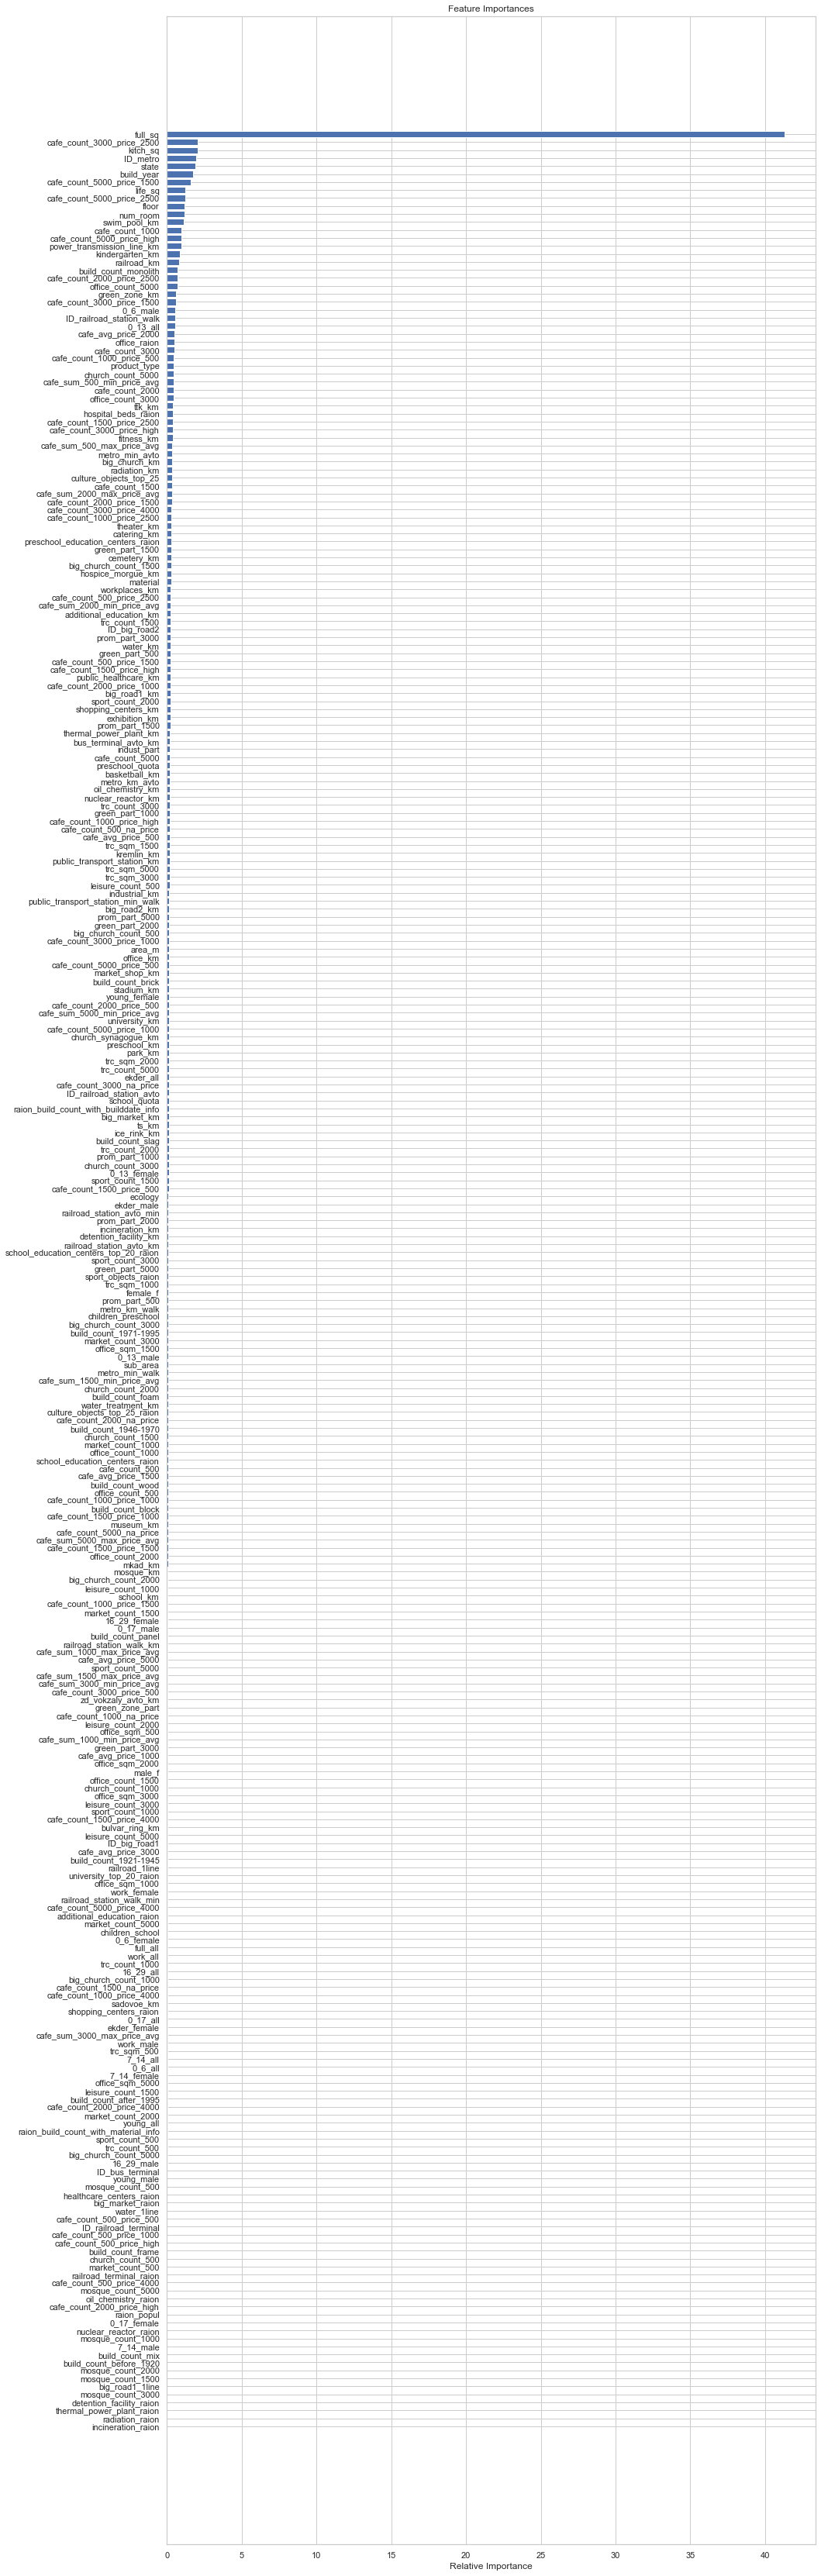

In [365]:

features= X_train.columns
importances = model_cb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (15,60))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [366]:
file_name = 'preliminary_trained_model.pkl'

In [367]:
pickle.dump(model_cb, open(file_name, 'wb'))

In [368]:
y_pred = model_cb.predict(X_valid)

In [369]:
valid_df = pd.read_csv('project_data/attempt_4/test.csv')

In [370]:
X_test = func.process(valid_df, 'test')

In [372]:
submissions = model_cb.predict(X_test)

In [381]:
result = pd.DataFrame(valid_df['id'])

In [382]:
result['price_doc'] = submissions.tolist()

In [383]:
result = result.set_index('id')

In [384]:
result.head()

,price_doc
id,
30474,5.778688e+06
30475,8.953457e+06
30476,5.266653e+06
30477,6.377406e+06
30478,5.479101e+06


In [385]:
result[result['price_doc'] < 0].count()

price_doc    0
dtype: int64

In [386]:
result.to_csv('submission.csv')